In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import warnings

# Add src directory to path
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import json

# Import our custom modules
from features import FeatureExtractor, TextCleaner
from models import BaselineModel, Persistence
from train import TrainingPipeline
from evaluate import ModelEvaluator
from sklearn.metrics import confusion_matrix

print(f"Timestamp: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Timestamp: 2025-08-30 14:50:29


## Config Loading

In [2]:
# Load configuration from JSON
config_path = '../config/model_baseline_config.json'
with open(config_path, 'r') as f:
    config = json.load(f)

## Baseline Model Training

In [3]:
training_pipeline = TrainingPipeline(config, use_wandb=False).run_full_pipeline()

INFO:train:Starting full training pipeline...
INFO:train:Loading data...
INFO:train:Training set: (797334, 9)
INFO:train:Validation set: (99667, 9)
INFO:train:Positive values of target: 7.771%
INFO:train:Positive values of obscene: 0.544%
INFO:train:Positive values of identity_attack: 0.676%
INFO:train:Positive values of insult: 5.751%
INFO:train:Positive values of threat: 0.231%
INFO:train:Positive values of sexual_explicit: 0.255%
INFO:train:Training model...
INFO:models.baseline:Training logistic_regression model...
INFO:features:Fitting feature extractor with method: tfidf
INFO:features:Feature extractor fitted.
INFO:features:Vocabulary size: 10,000
INFO:features:Feature matrix sparsity: 0.9980
INFO:features:Average features per comment: 20.1
INFO:features:Transformed 797334 texts to 10000 features
INFO:models.baseline:Model training completed. Samples: 797334, Features: 10000
INFO:evaluate:W&B integration disabled
INFO:evaluate:Model loaded successfully
INFO:evaluate:Evaluating mu

In [4]:
model = training_pipeline.model
feature_extractor = model.feature_extractor
evaluator = training_pipeline.evaluator

In [5]:
# Display sample feature names
print(f"\nSample feature names:")
feature_names = feature_extractor.get_feature_names()
sample_features = np.random.choice(feature_names, 5, replace=False)
for i, feature in enumerate(sample_features):
    print(f"  {i+1}. '{feature}'")


Sample feature names:
  1. 'fentanyl'
  2. 'divine'
  3. 'catholicism'
  4. 'surrounding'
  5. 'bashing'


In [6]:
model.display_feature_importance()

Feature Importance Analysis

Top 10 Important Features for target:
 Top features indicating toxic content:
    1. 'stupid' (coef: 29.7918)
    2. 'idiots' (coef: 24.5059)
    3. 'idiot' (coef: 24.4545)
    4. 'stupidity' (coef: 23.2826)
    5. 'idiotic' (coef: 20.2125)
 Top features indicating non-toxic content:
    1. 'black white' (coef: -4.3866)
    2. 'cases' (coef: -3.1150)
    3. 'solutions' (coef: -2.9886)
    4. 'stronger' (coef: -2.9374)
    5. 'addressed' (coef: -2.9246)

Top 10 Important Features for obscene:
 Top features indicating toxic content:
    1. 'damn' (coef: 40.5038)
    2. 'shit' (coef: 35.9318)
    3. 'crap' (coef: 35.7931)
    4. 'ass' (coef: 29.5347)
    5. 'darn' (coef: 28.3242)
 Top features indicating non-toxic content:
    1. 'debt' (coef: -6.6245)
    2. 'referring' (coef: -6.3367)
    3. 'accept' (coef: -6.3122)
    4. 'discussion' (coef: -6.2831)
    5. 'badly' (coef: -6.0445)

Top 10 Important Features for identity_attack:
 Top features indicating toxi

## Model Evaluation

Overall Performance
--------------------
Samples: 99,667
Targets: 6
AUC: 0.9157
Average Precision: 0.3682

Per-Target Performance
--------------------
                 precision    recall  f1-score  support
target            0.384630  0.796658  0.518787   7721.0
obscene           0.061762  0.677298  0.113202    533.0
identity_attack   0.114268  0.797357  0.199890    681.0
insult            0.363121  0.812272  0.501879   5753.0
threat            0.048901  0.626050  0.090715    238.0
sexual_explicit   0.052770  0.641434  0.097517    251.0
micro avg         0.264246  0.793174  0.396424  15177.0
macro avg         0.170908  0.725178  0.253665  15177.0
weighted avg      0.342253  0.793174  0.470145  15177.0
samples avg       0.053355  0.062826  0.055886  15177.0

Multilabel Confusion Matrix
--------------------


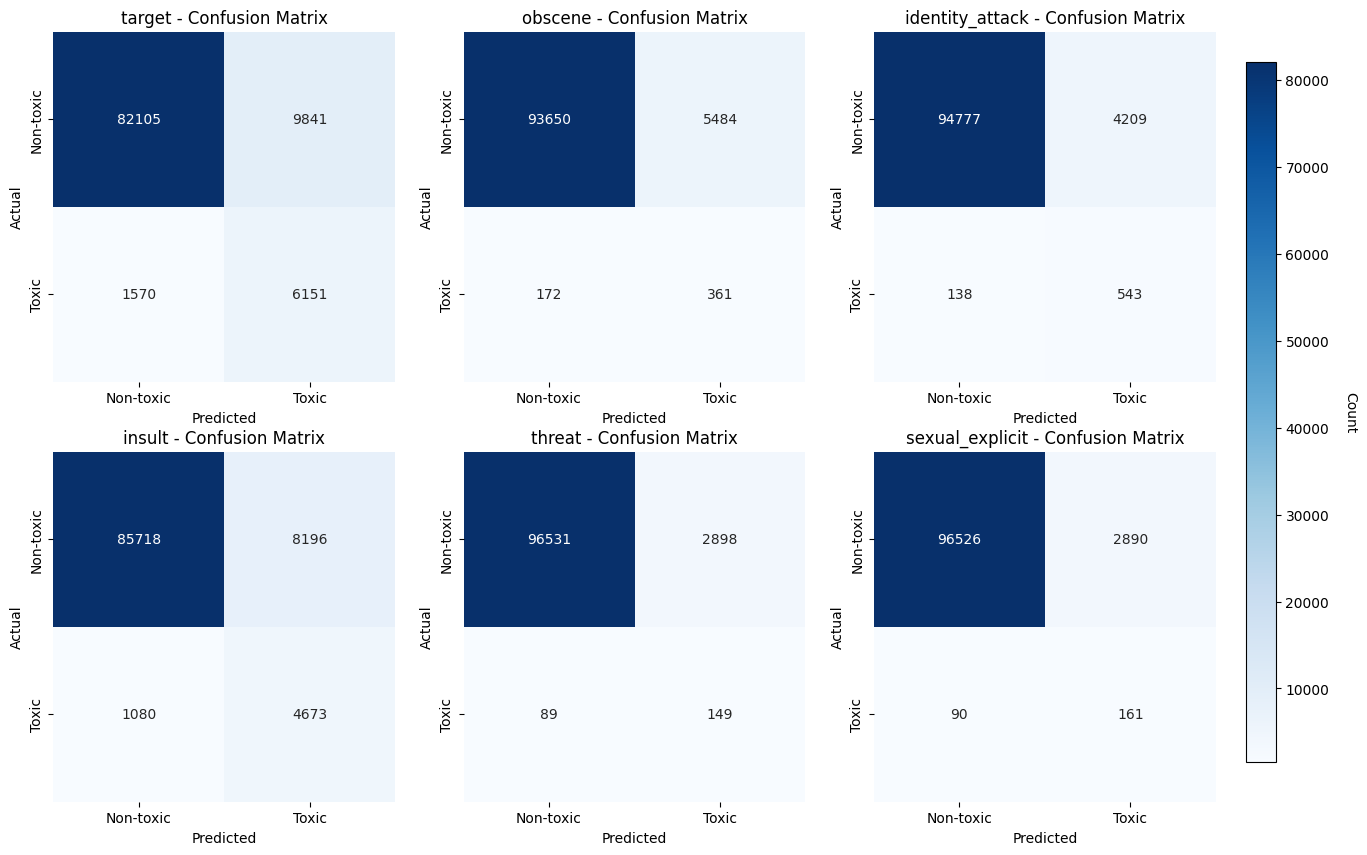

In [7]:
evaluator.generate_report()

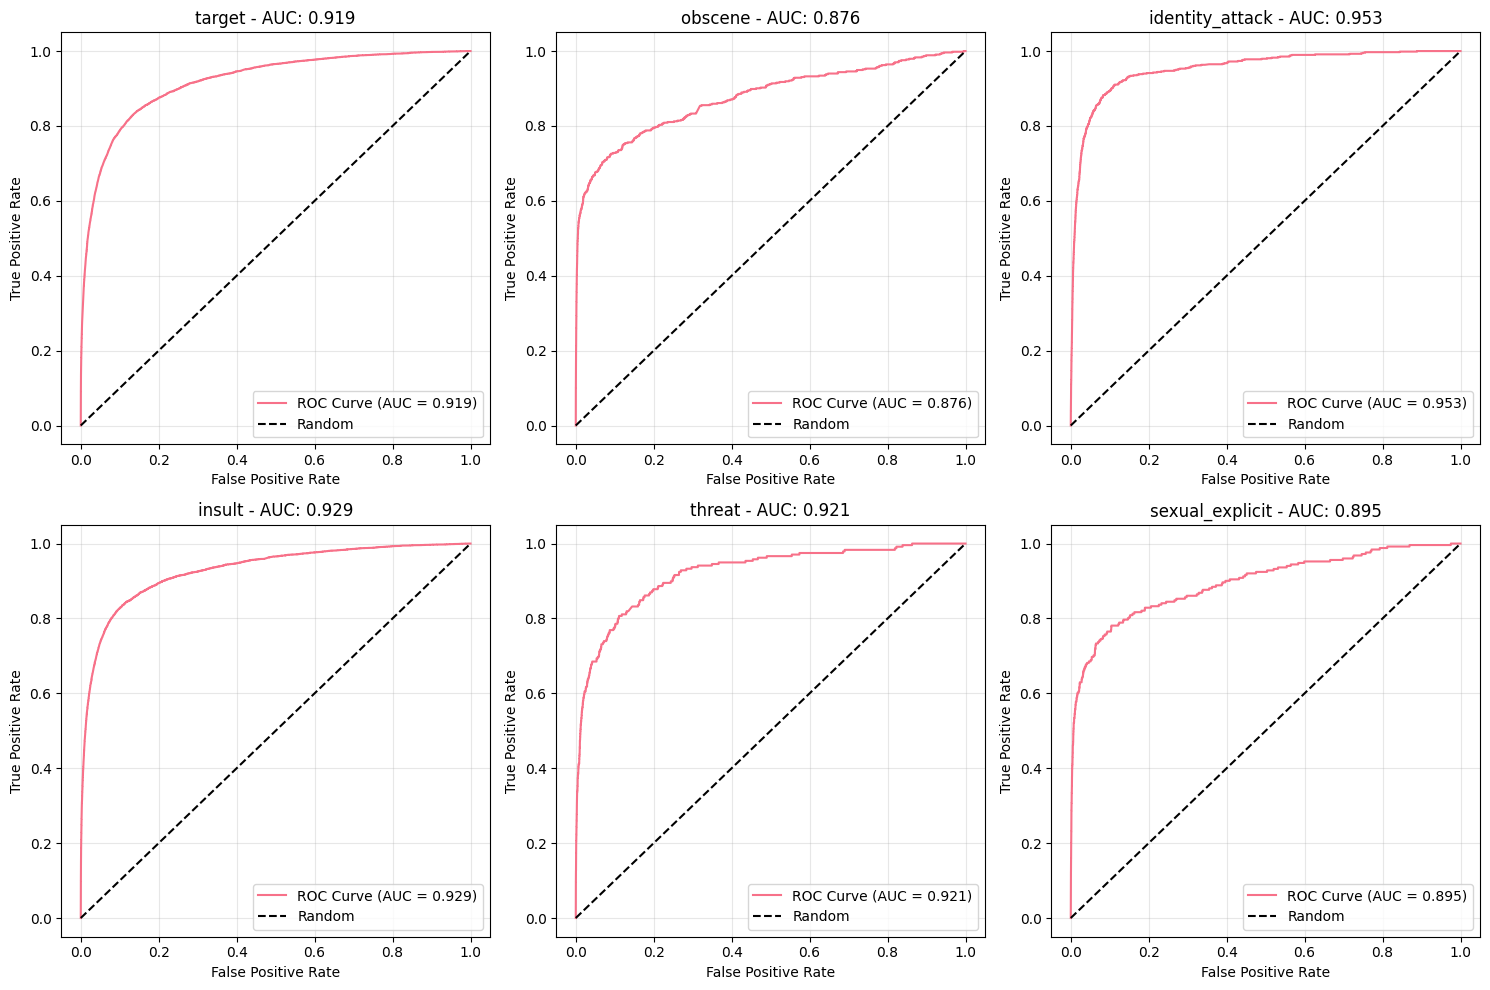

In [8]:
evaluator.plot_roc_curves()

## Model Persistence

In [9]:
# Save the final version of the model
Persistence.save(model, config)

INFO:models.baseline:Model saved to ../artifacts/models/baseline_v1.joblib
INFO:models.persistence:Saved the model baseline_v1 to ../artifacts/models/
INFO:models.persistence:Saved the config baseline_v1 to ../artifacts/configs/
